In [1]:
import torch
import sys
import numpy as np
 
from transformers import GPT2Tokenizer, GPT2LMHeadModel
# Load pre-trained model (weights)
with torch.no_grad():
        model = GPT2LMHeadModel.from_pretrained('gpt2')
        model.eval()
# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
 
def score(sentence):
    tokenize_input = tokenizer.encode(sentence)
    tensor_input = torch.tensor([tokenize_input])
    loss=model(tensor_input, labels=tensor_input)[0]
    return np.exp(loss.detach().numpy())
 
if __name__=='__main__':
    for line in sys.stdin:
        if line.strip() !='':
            print(line.strip()+'\t'+ str(score(line.strip())))
        else:
            break

In [2]:
import pandas as pd
df = pd.read_csv('formal_informal_data_50000.csv')

In [3]:
df = df.sample(5000)

In [4]:
score('Thank you so much for the opportunity.')

10.488229

In [5]:
score('I thank u for this opportunity.')

78.39175

In [6]:
score('How is you doing?')

29.42647

In [7]:
score('How are you doing?')

9.842655

In [8]:
score('How is you doingtonki?')

514.2123

In [9]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import numpy as np 


model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

In [10]:
def score(tokens_tensor):
    loss=model(tokens_tensor, labels=tokens_tensor)[0]
    return np.exp(loss.cpu().detach().numpy())

texts = ['i would like to thank you mr chairman', 'i would liking to thanks you mr chair in', 'thnks chair', 'What a fortune to seeing you']
for text in texts:
    tokens_tensor = tokenizer.encode( text, add_special_tokens=False, return_tensors="pt")           
    print (text, score(tokens_tensor))

i would like to thank you mr chairman 122.30583
i would liking to thanks you mr chair in 1183.766
thnks chair 14135.237
What a fortune to seeing you 629.4808


In [11]:
score(tokenizer.encode('hey', add_special_tokens=False, return_tensors="pt"))

nan

In [12]:
%%time
df['scores'] = df['text'].apply(lambda x: score(tokenizer.encode(x, add_special_tokens=False, return_tensors="pt")))

Wall time: 7min


<AxesSubplot:>

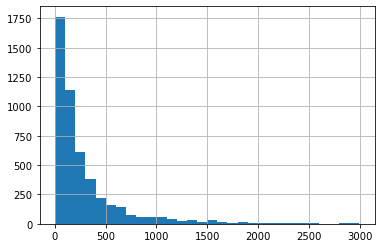

In [13]:
df[df['scores'] < 3000]['scores'].hist(bins=30)

In [23]:
df[df['scores'] > 200].sample(5)

,text,label,scores
11440,i would say cat stevens..the cat and the cradl...,0,436.452271
13484,maps by the yeah yeah yeahs,1,480.917145
21542,i love high school musical too!!!!!!,1,708.377686
39775,OMG!~* i loveee that movie soo much!,1,390.960297
43716,Song is Tell Me by The Groove Theory,1,288.339172


In [22]:
df[df['scores'] < 80].sample(5)

,text,label,scores
48097,"No, I did not know that!",1,16.243011
4921,"how much can any one person do, anyway?",0,58.709293
5676,ANY ONE WHO DOES THAT TO A ANIMAL NEEDS TO BE ...,0,62.832977
32524,are you even still in school?,0,57.336716
20566,Ok - I couldn't find a match for your lyrics -...,0,34.632671


In [55]:
from nltk.tokenize import sent_tokenize

def GPT2_Sentence_Scorer(text):
    scores = []
    sentences = sent_tokenize(text)
    for sent in sentences:
        scores.append((score(tokenizer.encode(sent, add_special_tokens=False, return_tensors="pt")), sent))
    return scores

In [60]:
hi = GPT2_Sentence_Scorer("We made a mistake and sent you the wrong payment information in the last email. So please refer to the attached file in this email for our correct information. We want to apologize for any inconvenience our mistake caused you. We understand that it is really unprofessional of us and guarantee it will not happen again in the future. To make this up for you, please accept a [discount percentage] voucher for your next purchase on our website as our deepest apology. Thank you for your understanding.")

In [61]:
hi

[(49.353928,
  'We made a mistake and sent you the wrong payment information in the last email.'),
 (57.92725,
  'So please refer to the attached file in this email for our correct information.'),
 (19.922161,
  'We want to apologize for any inconvenience our mistake caused you.'),
 (25.183317,
  'We understand that it is really unprofessional of us and guarantee it will not happen again in the future.'),
 (72.01322,
  'To make this up for you, please accept a [discount percentage] voucher for your next purchase on our website as our deepest apology.'),
 (9.023671, 'Thank you for your understanding.')]

In [16]:
print('\033[2;31;43m CHEESY \033[0;0m')

 CHEESY 


In [25]:
from nltk.corpus import reuters

In [35]:
reuters.sents()

[['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.'], ['They', 'told', 'Reuter', 'correspondents', 'in', 'Asian', 'capitals', 'a', 'U', '.', 'S', '.', 'Move', 'against', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'U', '.', 'S', '.', 'And', 'lead', 'to', 'curbs', 'on', 'American', 'imports', 'of', 'their', 'products', '.'], ...]

In [36]:
for sent in reuters.sents()[:10]:
    print(' '.join(sent))

ASIAN EXPORTERS FEAR DAMAGE FROM U . S .- JAPAN RIFT Mounting trade friction between the U . S . And Japan has raised fears among many of Asia ' s exporting nations that the row could inflict far - reaching economic damage , businessmen and officials said .
They told Reuter correspondents in Asian capitals a U . S . Move against Japan might boost protectionist sentiment in the U . S . And lead to curbs on American imports of their products .
But some exporters said that while the conflict would hurt them in the long - run , in the short - term Tokyo ' s loss might be their gain .
The U . S . Has said it will impose 300 mln dlrs of tariffs on imports of Japanese electronics goods on April 17 , in retaliation for Japan ' s alleged failure to stick to a pact not to sell semiconductors on world markets at below cost .
Unofficial Japanese estimates put the impact of the tariffs at 10 billion dlrs and spokesmen for major electronics firms said they would virtually halt exports of products hi

In [ ]:
#3 datasets reuters, OANC and conversational